# Mini-stage d'analyse pour l'ingénieur

**Brigitte Bidegaray-Fesquet, Anastasia Konik, Hubert Leterme, Léopold Trémant**

<font color="red">Tous les documents pour ce TP sont disponibles dans le dossier [TP Jupyter LaTeX](https://chamilo.grenoble-inp.fr/main/document/document.php?cidReq=ENSIMAG3MMAI&id_session=0&gidReq=0&gradebook=0&origin=&id=775120) sur Chamilo.</font>

### Le but de ce mini-stage est

* de faire connaissance avec certaines librairies **python** permettant le calcul numérique ;
* de faire connaissance avec l'écriture de formules en **LaTeX**, outil de traitement de texte utilisé par les scientifiques ;
* de s'exercer au **compte-rendu de TP** ;
* de présenter ce TP dans un *notebook* permettant de présenter conjointement les calculs et la démarche suivie, et permettant la reproductibilité de vos résultats.

La partie 1 de ce sujet vous propose une introduction rapide au *notebook*. Prenez le temps de parcourir l'aide.
    
La partie 2 présente quelques librairies python pour les mathématiques avec une application aux sinusoïdes. Prenez le temps de répondre aux questions sur la représentation des vecteurs et des matrices. 
    
La partie 3 introduit les séries de Fourier et vous permettra dans l'écriture des réponses de vous familiariser avec l'écriture des équations en LaTeX. Des exemples vous sont donnés en éditant les zones <i>markdown</i> de ce sujet. C'est le cœur du sujet avec les propriétés des séries de Fourier et leur illustration numérique sur un exemple.
    
Enfin la dernière partie est plus libre et vous donne quelques pistes d'exploration autour du sujet.

La notation prendra en compte la qualité de la programmation du point de vue de l'utilisation du langage python et de l'algorithmique, et de la qualité de la rédaction tant en ce qui concerne la présentation en LaTeX que le contenu scientifique.

### Consignes pour le rendu 

* Travailler en binôme et déclarer ces binômes sur Teide. 
Les deux membres du binôme doivent être dans le même groupe de TP.
* Modifier le présent *notebook* en rédigeant les réponses dans les cellules prédéfinies.
* Renommer ce *notebook* &lt;NomBinome1-NomBinome2&gt;.ipynb et le déposer sur Teide.
* Le *notebook* doit s'exécuter parfaitement et présenter l'analyse des résultats obtenus (et non leur paraphrase puisque les résultats sont déjà visibles dans le *notebook*) et des commentaires éventuels permettant la compréhension des choix algorithmiques effectués ou des difficultés rencontrées. 
Le compte-rendu doit néanmoins rester relativement concis.
* Relisez-vous, soignez la présentation des figures et des formules mathématiques.

<h3 align=center><font color="red">Date limite de rendu : 19 novembre 2021 à 23h59</font></h3>

Bon courage à tous, et <u>n'hésitez pas à faire appel aux encadrants</u> aussi souvent que nécessaire !

## 1. Travailler dans un *notebook*

Si vous lisez ce texte, c'est que vous êtes arrivés à ouvrir le *notebook*. Bravo !

L'utilisation d'un *notebook* permet de réunir en un même lieu, la description du problème à résoudre et des méthodes utilisées, le code correspondant, les sorties du code et en particulier ici des graphiques, et l'analyse des résultats obtenus. C'est un des outils pour permettre la reproductibilité de résultats. 

### 1.1. Types de cellules

Il est constitué d'une succession de cellules notamment
* **des cellules de texte** (`Markdown`) dont le formattage est un mélande de *markdown*, d'HTML et de LaTeX. Il suffit de double-cliquer sur une telle cellule pour voir comment elle est rédigée. `Maj`-`Entrée` permet d'interpréter le contenu de la cellule.
* **des cellules de code**, dans lesquelles ont rédige le code. Leur exécution peut afficher des résultats ou des courbes.

### 1.2.  Formattage du texte

N'hésitez pas à imiter ! Par exemple, dans cette cellule, vous pouvez voir comment coder en *markdown* 
* un titre (de niveau 2 et 3),
* du texte en italique,
* du texte en gras,
* des commandes,
* une liste.

Dans la cellule au dessus, le changement de couleur de texte résulte de l'utilisation de commandes HTML (`<font color=red>...</font>`).

LaTeX (prononcer latek...) est utilisé pour écrire les formules mathématiques, mais ce langage dépasse de loin cet usage. Il sert pour écrire des documents complets où tout le contenu et le formattage sont codés dans ce langage. Vous trouverez plus d'informations sur Chamilo. Vous trouverez également plus loin des exemples d'utilisation, dans la présentation des séries de Fourier. 

Pour un joli rendu, toutes les formules, même constituées d'un symbole unique, doivent être en LaTeX.
Les formules *en ligne* doivent être encadrées par des dollars (`$formule$`). Il y a plusieurs façons de disposer des formules sur une ligne à part, ici nous utilisons `\begin{equation}une ligne de formule\end{equation}` pour une seule ligne et `\begin{align}plusieurs lignes de formule\end{align}` pour aligner plusieurs lignes séparées par `\\`.


### 1.3. L'aide

Dans l'onglet `Help`, vous y trouverez notamment de l'aide sur
* le fonctionnement d'un notebook,
* le langage markdown,
* quelques librairies python.

Vous pouvez également accéder à la documentation de python en tapant `help()`.
Laissez-vous guider. Essayez les recherches suivantes.
* `print`
* `symbols`

N'oubliez pas de faire `quit` à la fin...

In [68]:
print(1)

1


Vous pouvez aussi directement demander l'aide d'une fonction particulière.

In [69]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



## 2. Signaux sinusoïdaux purs &mdash; premiers pas en python

L'analyse de Fourier est basée sur la représentation à l'aide de signaux sinusoïdaux purs. Un signal pur de fréquence $\lambda$ s'écrit
\begin{equation}
t \mapsto \sin(2\pi\lambda t).
\end{equation}
En guise d'échauffement en python, nous allons voir comment les calculer numériquement et les représenter graphiquement. 

### 2.1. Librairies python utiles

Pour le présent TP, nous aurons besoin d'un certain nombre de librairies pour les mathématiques.
* la commande `%matplotlib inline` permet d'effectuer les graphismes en ligne dans le *notebook*,
* `matplotlib.pyplot` contient les fonctions pour tracer les courbes,
* `numpy` contient les fonctions pour le travail sur les tableaux et les matrices,
* `math` contient les fonctions mathématiques usuelles.

À noter que les fonctions de base ont aussi des versions qui s'appliquent à des vecteurs terme-à-terme dans la librairie `numpy`. Pour savoir exactement ce que l'on utilise, on a intérêt à expliciter les librairies et à ne pas tout importer avec `*`.

Commençons par importer les librairies nécessaires. À noter que ce qui est déjà importé dans un *notebook* n'est pas à ré-importer lors d'utilisations ultérieures. 

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi, cos, sin

Pour une implémentation numérique des fonctions, nous allons bien sûr devoir nous limiter à leur discrétisation, c'est-à-dire ici à leur représentation par leurs valeurs sur un ensemble discret et fini de points. Ces points ainsi que les valeurs de fonctions en ces points seront donc représentés par des vecteurs.

### 2.2. Vecteurs et matrices

La façon la plus simple de définir une matrice $n \times m$ en python est d'entrer au clavier la liste de ses éléments, par exemple

```
A = np.array([[a11, a12, a13], [a21, a22, a23]])
```

**Opérations élémentaires**

* `A[k, :]` $k$-ième ligne de la matrice $A$       
* `A + B` somme
* `np.matmul(A, B)` ou `A@B` produit matriciel
* `A * B` produit terme à terme
* `np.linalg.det(A)` déterminant de $A$
* `np.transpose(A)` transposée de $A$
* `np.linalg.inv(A)` inverse de $A$

En python, la numérotation commence à 0.

#### <font color=blue>Questions : Testez les opérations sur les matrices</font>

Définir la matrice
\begin{equation}
    M = \begin{pmatrix}
      1 & 0 & 3 & 1 \\
      1 & 2 & 0 & 1 \\
      0 & 1 & 3 & 0
    \end{pmatrix}.
\end{equation}
1. Quelle est la commande donnant les dimensions de la matrice $M$ ?

In [71]:
M = np.array([[1, 0, 3, 1], [1, 2, 0, 1], [0, 1, 3, 0]])
x, y = np.shape(M)
print(f"M de dimension : {x}x{y}")

M de dimension : 3x4


2. Extraire la première ligne, la dernière colonne et l'élément à la deuxième ligne, troisième colonne de $M$.

In [72]:
print(f"première ligne : {M[0, :]}\n"
      f"dernière colonne : {M[:, -1]}\n"
      f"élément deuxième ligne, troisième colonne : {M[1, 2]}")

première ligne : [1 0 3 1]
dernière colonne : [1 1 0]
élément deuxième ligne, troisième colonne : 0


3. À l'aide de fonctions de la librairie numpy, extraire la diagonale, les parties triangulaires supérieures et inférieures de $M$.

In [73]:
print(f"diagonal : {np.diag(M)}\n"
      f"triangulaires supérieures : \n{np.triu(M)}\n"
      f"triangulaire inférieures : \n{np.tril(M)}")

diagonal : [1 2 3]
triangulaires supérieures : 
[[1 0 3 1]
 [0 2 0 1]
 [0 0 3 0]]
triangulaire inférieures : 
[[1 0 0 0]
 [1 2 0 0]
 [0 1 3 0]]


4. En utilisant les fonctions `np.ones` et `np.diag`, définir la matrice identité $10\times 10$.


In [74]:
print(np.diag(np.ones(10)))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


5. En utilisant ces mêmes fonctions, définir la matrice tridiagonale d'ordre $10$ suivante :
\begin{equation}
      C = \begin{pmatrix}
          2 & -1& & \mathbf{0} \\
          1 & 2 & \ddots & \\
          & \ddots & \ddots & -1 \\
          \mathbf{0}& & 1 & 2 \\
        \end{pmatrix}
\end{equation}

In [75]:
#print(np.tril([1, 2, 3, 4])) pour comprendre tril et triu sur des vecteurs
A = np.tril(np.ones(10), -1)
B = np.tril(np.ones(10), -2)
C1 = A - B
A = np.triu(-np.ones(10), 1)
B = np.triu(-np.ones(10), 2)
C2 = A - B
A = np.diag(2*np.ones(10))
R = A + C1 + C2
print(R)

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  2.]]


### 2.3. Définir et tracer des fonctions
#### 2.3.1. Définition de fonctions

Considérons par exemple la fonction 
\begin{equation}
f(x) = \sin(2\pi x)+\cos(\pi x).
\end{equation}
Nous pouvons la définir ainsi en python
```
def f(x):
     return sin(2 * pi * x) + cos(pi * x)
```

#### 2.3.2. Fonctions échantillonnées (= discrétisées)

Pour le calcul numérique, une fonction peut être définie uniquement en des points de discrétisation de la variable $x$. Par exemple

```
x = np.linspace(0, 1, 11)
```
correspond à une discrétisation par pas de $0.1=1/(11-1)$, de l'intervalle $[0,1]$, soit 11 valeurs. On définit alors la fonction sur cette grille discrète. Avec l'exemple précédent, il vaut mieux redéfinir
```
def f(x):
     return np.sin(2 * pi * x) + np.cos(pi * x)
```
et alors il suffit d'écrire
```
y = f(x)
```

#### 2.3.3. Tracé de courbes

Pour tracer une courbe $y=x^2$ sur l'intervalle $[a,b]$ :
```
x = np.linspace(a, b, n) # x est échantillonné entre a et b avec un pas de (b-a)/(n-1)
z = x**2
plt.plot(x, z)
```

##### Pour varier le trait ou la couleur

Par exemple, pour tracer en rouge :
```
plt.plot(x, z, 'r-')
```
Dans la chaîne de caractères (troisième argument), on donne une lettre imposant la couleur (`r` pour *red*, `b` pour *blue*, `g` pour *green*...) et un symbole pour le trait (`-` pour un trait continu (par défaut), `--` pour des tirets, `:` pour des pointillés...). Pour plus de détails, voir la documentation de `matplotlib.lines.Line2D`.

##### Pour tracer plusieurs courbes, rajouter un titre, des axes, une légende

```
x = np.linspace(0, 10, 101)
plt.plot(x, np.cos(x), 'r', label='cosinus')
plt.plot(x, np.sin(x), 'b', label='sinus')
plt.title('Graphe des fonctions cos et sin')   # titre
plt.xlabel('temps')
plt.ylabel('f(t)');                            # noms des axes
plt.legend()                                   # légende
```

##### Pour tracer plusieurs graphes dans une fenêtre
La commande `plt.subplot(n, m, p)`, placée avant un tracé de courbe, subdivise la fenêtre du graphe en une matrice $n\times m$ de sous-fenêtres et sélectionne la $p$-ième pour dessiner le graphe courant&nbsp;: l'élément $(i, j)$ de la matrice correspond au graphe numéro $(i-1)n + j$.

##### Pour exporter une figure
La commande `plt.savefig('<fichier', format='pdf')`permet de sauver la figure courante au format pdf. D'autres formats sont possibles.

#### <font color = blue>Question : Testez le tracé de fonctions</font>

Tracer avec deux couleurs différentes les courbes de la fonction sinus sur l'intervalle $[0,2\pi]$ pour 6 points de discrétisation et 21 points de discrétisation. 
Ajouter un titre et une légende.

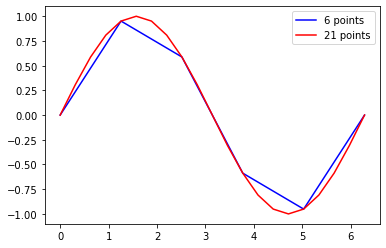

In [76]:
x6 = np.linspace(0, 2*pi, 6)
x21 = np.linspace(0, 2*pi, 21)

plt.plot(x6, np.sin(x6), 'b', label='6 points')
plt.plot(x21, np.sin(x21), 'r', label='21 points')
plt.legend()
plt.show()

## 3. Les séries de Fourier

pour en savoir plus : <br>
[Ber14] Maïtine Bergounioux, [*Mathématiques pour le traitement du signal*](https://beluga.univ-grenoble-alpes.fr/permalink/33UGRENOBLE_INST/rgi2mt/alma991003269059706161), 2e édition, Dunod (2014).
<br>
[Sch01] Michelle Schatzman, [*Analyse numérique : une approche mathématique*](https://beluga.univ-grenoble-alpes.fr/permalink/33UGRENOBLE_INST/1vb34gl/alma991005329019706161), chapitre "Du côté de chez Fourier", Dunod (2001).

### 3.1. Notations

#### Polynômes trigonométriques

On appelle $\mathbb{T}_N$ l'espace vectoriel des polynômes trigonométriques de degré au plus $N$ qui s'écrivent sous la forme 
\begin{equation}
\sum_{n=-N}^N c_n \exp\left(2i\pi n\dfrac tT\right),
\end{equation}
où pour $n\in\{-N,\dots,N\}$, $c_n$ est un nombre complexe. Ces polynômes trigonométriques sont clairement des fonctions périodiques de période $T$.

#### Espaces fonctionnels

On note $\mathcal{C}_{\rm per}^k$ l'espace des fonctions $k$ fois continûment différentiables, périodiques de période $T$. Un cas particulier est $\mathcal{C}_{\rm per}^0$, espace des fonctions continues, pérodiques de période $T$.

On note $\mathcal{L}_{\rm per}^1$ l'ensemble des fonctions Lebesgue-intégrables sur tout intervalle borné de $\mathbb{R}$, périodiques de période $T$. On le munit de la norme
\begin{equation}
\|f\|_1 = \int_0^{T} |f(t)| dt.
\end{equation}

On note $\mathcal{L}_{\rm per}^2$ l'ensemble des fonctions de carré Lebesgue-intégrables sur tout intervalle borné de $\mathbb{R}$ (modulo les fonctions négligeables), périodiques de période $T$. On le munit de la norme
\begin{equation}
\|f\|_2 = \left(\int_0^{T} |f(t)|^2 dt\right)^{1/2}.
\end{equation}

### 3.2. Coefficients de Fourier complexes

Etant donné $f\in\mathcal{L}_{\rm per}^1$, on définit le $n$-ième coefficient de Fourier par 
\begin{equation}
c_n(f) = \frac 1T \int_0^T f(t) \exp\left(-2i\pi n\dfrac tT\right) dt.
\end{equation}
On peut alors construire le polynôme trigonométrique
\begin{equation}
S_N(t) = \sum_{n=-N}^N c_n(f) \exp\left(2i\pi n\dfrac tT\right).
\end{equation}

Si de plus $f\in\mathcal{L}_{\rm per}^2$, on peut montrer que $S_N$ réalise l'approximation au sens des moindres carrés de $f$ dans $\mathbb{T}_N$, c'est-à-dire que
\begin{equation}
\forall P\in\mathbb{T}_N,\ \int_0^T |f-S_N|^2 dt \leq \int_0^T |f-P|^2 dt.
\end{equation}

**<font color=blue>Question :</font>** 
Rappeler la formule de quadrature des rectangle à gauche permettant d'approcher l'intégrale $c_n(f)$ avec $J$ points de discrétisation en espace régulièrement espacés. (Cela revient à généraliser la formule vu sur la première feuille de TD pour une intégrale sur $[0,T]$)

Réponse :
<br>On approche l'intégrales avec des rectangles gauches. je note $h=\frac TJ$.<br>
Ainsi :
\begin{equation}
c_n(f) \simeq \frac 1T \sum_{n=0}^{J-1} hf(kh) \exp\left(2i\pi n \frac{hk}{T}\right)
\end{equation}

**<font color=blue>Question :</font>** 
Définir une fonction `discreteFourier` qui prend en entrée 
* la période $T$
* les valeurs d'une fonction $f$ discrétisée avec $J$ points sur $[0,T]$ 
* et le degré du polynôme trigonométrique $N$ 

et retourne les coefficients de Fourier $c_n(f)$. 

In [77]:
def coefs_f(T, fs, n):
    """
        calcul le coef de fourier de f d'ordre n
        fs est une liste des points des valeurs de f
        Le pas doit être constant
    """
    somme = 0
    J = len(fs)
    #h = T/J
    alph = -2*1j*pi*n
    for k in range(0, J):
        somme += fs[k]*np.exp(alph*k/J)
    return somme/J

def discreteFourier(T, fs, N):
    """
        calcul la liste des coefficients cn(f)
    """
    J = len(fs)
    coefs = []
    for n in range(-N, N+1):
        coefs.append(coefs_f(T, fs, n))
    return coefs

#test
x = np.linspace(0, 2*pi, 2000)
sinx = np.sin(x)
print(np.round(discreteFourier(2*pi, sinx, 5), 2))

[-0.-0.j  -0.-0.j  -0.-0.j  -0.-0.j   0.+0.5j -0.+0.j   0.-0.5j -0.+0.j
 -0.+0.j  -0.+0.j  -0.+0.j ]


**<font color = blue>Question :</font>** 
Définir une fonction `invFourier` qui prend en entrée 
* la période $T$
* des coefficients de Fourier $c_n$ 
* et le nombre $J$ de points de discrétisation en espace 

et retourne la somme partielle $S_N$.

In [78]:
def invFourier(T, coefs, J):
    N = (len(coefs)-1)//2
    h = T/J
    valeurs = []
    for u in range(J):
        somme = 0
        for n in range(-N, N+1):
            somme += coefs[n + N]*np.exp(2*1j*n*pi*u*h/T)
        valeurs.append(somme)
    return valeurs

### 3.3. Un exemple

Soient $0<a\leq T$ et un signal créneau, c'est-à-dire la fonction périodique de période $T$ définie sur $[-T/2,T/2]$ par
\begin{equation}
f(t) = \begin{cases}
A & \text{sur } \left[-\dfrac a2,\dfrac a2\right], \\
0 & \text{ailleurs.}
\end{cases}
\end{equation}

**<font color = blue>Question :</font>** 
Définir cette fonction comme fonction python qui dépend de $t$, $a$, $T$ et $A$.<br>
Tracer cette fonction sur l'intervalle $[-T,T]$, pour les valeurs $T=2$, $a=0,4$, $A=1,5$.
(On gardera ces valeurs pour les illustrations numériques qui suivront.)

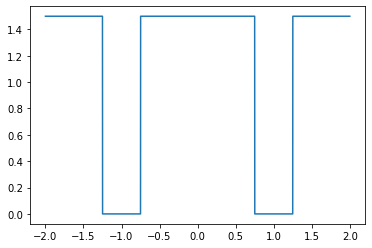

In [137]:
def creneau(t, a, T, A):
    if t>0:
        while t > T/2:
            t -= T
    else:
        while t < -T/2:
            t += T
    if -a/2 < t < a/2:
        return A
    else:
        return 0
    
x = np.linspace(-2, 2, 10000)
y = [creneau(x, 1.5, 2, 1.5) for x in x]
plt.plot(x, y)
plt.show()

**<font color = blue>Question :</font>** 
Calculer les coefficients de Fourier $c_n(f)$. 

Calcul des coeffs:
<br>Si $n=0$ : $c_0(f) = \frac{Aa}{T}$<br>
<br> Sinon <br>
\begin{align}
c_n(f) &= \frac 1T \int_{-\frac T2}^{\frac T2} f(t) \exp\left(-2i\pi n\dfrac tT\right) dt \\
       &= \frac 1T \int_{-\frac a2}^{\frac a2} A \exp\left(-2i\pi n\dfrac tT\right) dt \\
       &= \frac{A}{\pi n} \sin\left(\frac{\pi na}{T}\right)
\end{align}

**<font color = blue>Question :</font>** 
Calculer ces valeurs en utilisant `discreteFourier`.
On prendra $J=100$ points de discrétisation.
Que pensez-vous de l'approximation ?

In [80]:
A = 1.5
a = 0.4
T= 2
J = 100
x = np.linspace(0, T, J)
y = [creneau(x, a, T, A) for x in x]
N = 10
coef_f = discreteFourier(2, y, N)
print(np.round(coef_f, 2))

#Calcul avec la formul
coef = []

for n in range(-N, N+1):
    if n==0:
        coef.append(A*a/T)
    else:
        coef.append(A/pi/n*sin(pi*n*a/T))
    
#print(np.round(coef, 2))

diff = [abs(coef[k] - coef_f[k]) for k in range(2*N+1)]
print("Écart entre calcul et approximation (4 chiffres après la virgule) :")
print(np.round(diff, 4))

[-0.  +0.j   -0.03+0.01j -0.06+0.01j -0.06+0.01j -0.05+0.01j -0.  -0.j
  0.07-0.01j  0.15-0.01j  0.23-0.01j  0.28-0.01j  0.3 +0.j    0.28+0.01j
  0.23+0.01j  0.15+0.01j  0.07+0.01j -0.  +0.j   -0.05-0.01j -0.06-0.01j
 -0.06-0.01j -0.03-0.01j -0.  -0.j  ]
Écart entre calcul et approximation (4 chiffres après la virgule) :
[0.     0.0089 0.0143 0.0143 0.0088 0.     0.0088 0.0143 0.0143 0.0088
 0.     0.0088 0.0143 0.0143 0.0088 0.     0.0088 0.0143 0.0143 0.0089
 0.    ]


<font color = blue>Votre commentaire ici<font>

### 3.4. Coefficients réels

Reprenons une fonction $f$ générique.
En utilisant les formules d'Euler, on peut réécrire l'expression de $S_N$ sous la forme
\begin{equation}
S_N(t) = a_0(f) + \sum_{n=1}^N \left(a_n(f) \cos\left(2\pi n \dfrac tT\right) + b_n(f) \sin\left(2\pi n \dfrac tT\right) \right).
\end{equation} 

**<font color = blue>Question :</font>** 
Calculer les valeurs des $a_n(f)$ et des $b_n(f)$ en fonction des $c_n(f)$.

On calcul :  $c_n(f)-c_{-n}(f)$ et $c_n(f)+c_{-n}(f)$
 
\begin{align}
c_n(f)-c_{-n}(f) &= -\frac {2i}T \int_0^T f(t) \sin\left(2\pi n\dfrac tT\right) dt. \\
c_n(f)+c_{-n}(f) &= \frac 2T \int_0^T f(t) \cos\left(2\pi n\dfrac tT\right) dt. \\
S_N(t) &= \sum_{n=-N}^N \left(c_n(f) \left(\cos\left(2\pi n \dfrac tT\right) + i \sin\left(2\pi n \dfrac tT\right)\right) \right) \\
       &=  c_0(f) + \sum_{n=1}^N \left(c_n(f) \left(\cos\left(2\pi n \dfrac tT\right) + i \sin\left(2\pi n \dfrac tT\right)\right) \right) + \sum_{n=-N}^{-1} \left(c_n(f) \left(\cos\left(2\pi n \dfrac tT\right) + i \sin\left(2\pi n \dfrac tT\right)\right) \right)\\
       &= c_0(f) + \sum_{n=1}^N \left[c_n(f)+c_{-n}(f)\right]cos\left(2\pi n \frac tT\right) + i\left[c_n(f)-c_{-n}(f)\right]sin\left(2\pi n \frac tT\right) \\
a_0(f) &= c_0(f) \\
a_n(f) &= c_n(f)+c_{-n}(f) \\
b_n(f) &= i[c_n(f)-c_{-n}(f)]
\end{align}


On peut également l'écrire
\begin{equation}
S_N(t) = A_0(f) + \sum_{n=1}^N A_n(f) \cos(2\pi n \lambda t + \varphi_n(f)).
\end{equation} 

**<font color = blue>Question :</font>** 
Calculer les valeurs des $A_n(f)$ et des $\varphi_n(f)$ en fonction des $a_n(f)$ et des $b_n(f)$ d'une part, puis en fonction des $c_n(f)$.

Déjà on a : $A_0(f)=a_0(f)=c_0(f)$

Avec des formules de trigonométrie :
\begin{align}
\alpha_n &= \frac {2 \pi n}{T} \\
A_n(f)cos\left(\alpha t + \phi_n(f)\right) &= A_n(f)\left[cos(\alpha t)cos(\phi_n(f)) - sin(\alpha t)sin(\phi_n(t))\right]
\end{align}

\begin{align}
\begin{cases}
&a_n(f) = A_n(f)cos(\phi_n(f)) \\
&-b_n(f) = A_n(f)sin(\phi_n(f))
\end{cases}
\end{align}

Ainsi :
\begin{align}
\begin{cases}
&A_n(f)^2 = a_n(f)^2+b_n(f)^2 \\
& \phi_n(f)=arctan \left(-\frac {b_n(f)}{a_n(f)} \right)
\end{cases}
\end{align}

On aurait pu faire les calculs autrement (pour $n \ne 0$) :
\begin{align}
\overline{c_n(f)} &= c_{-n}(f) \\
c_n(f) &= re^{\alpha} \\
\\
c_n(f)e^{2i \pi n \frac tT} + c_{-n}(f)e^{2i \pi n \frac tT} &= A_n(f)cos\left(2 \pi n \frac tT + \phi_n(f) \right) \\
2r cos\left ( 2 \pi n \frac tT + \alpha \right ) &= A_n(f)cos \left ( 2 \pi n \frac tT + \phi_n(t) \right)
\end{align}

\begin{cases}
&A_n(f) = 2r = 2|c_n(f)| \\
&\phi_n(f) = \alpha = arg \left ( c_n(f) \right)
\end{cases}




**<font color = blue>Question :</font>** 
Représenter sur deux graphes côte-à-côte, $|c_n(f)|$ en fonction de $n$ et $\arg(c_n(f))$ en fonction de $n$ pour la fonction créneau précédemment définie. 

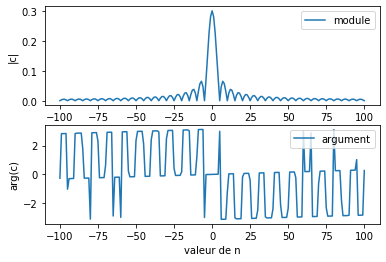

In [81]:
N = 100
T = 2

A = 1.5
a = 0.4
T= 2
J = 1000

x = np.linspace(0, T, J)
y = [creneau(x, a, T, A) for x in x]
coef_f = discreteFourier(2, y, N)

n = [i for i in range(-N, N+1)]


mod = np.abs(coef_f)
arg = np.angle(coef_f)

plt.subplot(2, 1, 1)
plt.plot(n, mod,  label="module")
plt.ylabel('|c|')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(n, arg, label="argument")
plt.ylabel('arg(c)')
plt.xlabel('valeur de n')
plt.legend()
plt.show()




### 3.4. Convergence

Tout l'intérêt des séries de Fourier est qu'elles convergent en un certain sens vers la fonction de départ. 

#### Inégalité de Bessel

Soit $f\in\mathcal{L}_{\rm per}^2(0,T)$ alors 
\begin{equation}
\sum_{n=-N}^N |c_n|^2 \leq \frac1T \int_0^T |f(t)|^2 dt.
\end{equation}

#### Convergence des sommes partielles

Par ailleurs la suite $S_N$ des polynômes trigonomériques de meilleure approximation dans $\mathbb{T}_N$ converge vers $f$ dans $\mathcal{L}_{\rm per}^2(0,T)$ :
\begin{equation}
\lim_{N\to\infty} \|f-S_N\|_2 = 0.  
\end{equation}
Cela veut dire que la série $\sum_n c_n(f)\exp(2i\pi n t/T)$ converge normalement et donc presque partout vers $f$.

#### Égalité de Parseval

Soit $f\in\mathcal{L}_{\rm per}^2(0,T)$ alors 
\begin{equation}
\sum_{n=-\infty}^\infty |c_n|^2 = \frac1T \int_0^T |f(t)|^2 dt.
\end{equation}

**<font color = blue>Question :</font>** 
Illustrer graphiquement l'inégalité de Bessel et l'égalité de Parseval sur l'exemple de la fonction créneau. 

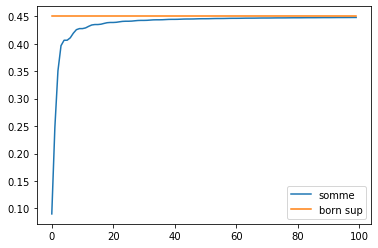

In [82]:
droite = A**2*a/T #membre de droite de bessel

N = 100

A = 1.5
a = 0.4
T= 2
J = 1000
x = np.linspace(0, T, J)
y = [creneau(x, a, T, A) for x in x]
coef_f = discreteFourier(T, y, N)

sommes = []

for n in range(N):
    un = coef_f[N-n:N+n+1]
    
    absun = np.abs(un)
    
    absun *= absun
    sommes.append(sum(absun))

nlist = [i for i in range(N)]
list_droite = [droite for n in nlist]
plt.plot(nlist, sommes, label="somme")
plt.plot(nlist, list_droite, label="born sup")
plt.legend()
plt.show()

On voit que la somme est croissante de limite l'intégral. C'est-à-dire, que l'intégral majore les sommes partiels et que la limite est l'intégral.

#### Théorème de Dirichlet

Soit $f\in\mathcal{L}_{\rm per}^1(0,T)$ et $t_0$ tel que $f$ admette une limite à droite et à gauche en $t_0$, respectivement notées $f(t_0^+)$ et $f(t_0^-)$ alors 
\begin{equation}
\lim_{N\to\infty} \sum_{n=-N}^N c_n(f)\exp\left(2i\pi n \dfrac {t_0}T\right) = \dfrac{f(t_0^+)+f(t_0^-)}2 
\end{equation}

**<font color = blue>Question :</font>**  
Toujours avec $N=10$ et $J=100$. Sur un même graphique, tracer la fonction créneau et sa somme de Fourier partielle de degré $N$.

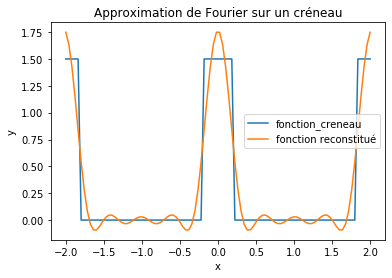

In [85]:
N=10
J=100
A = 1.5
a = 0.4
T= 2

X = np.linspace(-T, T, J)
y = [creneau(x, a, T, A) for x in X]
coef_f = discreteFourier(T, y, N)
inv_y = invFourier(T, coef_f, J)
inv_y = np.real(inv_y)
plt.plot(x, y, label="fonction_creneau")
plt.plot(x, inv_y, label="fonction reconstitué")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Approximation de Fourier sur un créneau")
plt.show()


## 4. Et si on allait plus loin ?

Pour la suite, on vous propose trois pistes d'exploration libre.

### Faire varier les paramètres de discrétisation

Dans tout ce qui précède on avait fixé la valeur du nombre de modes de Fourier $N$ et du nombre de points de discrtéisation en temps $J$. Reprendre les différentes observation ci-dessus et commenter l'impact du choix de ces paramètres numériques sur les résultats.

### Faire varier $a$.

Le spectre obtenu dans l'exemple donné dépend bien sûr de $a$. Analyser et trouver une représentation graphique de la modification du spectre quand on fait varier $a$ dans sa plage de valeurs admissibles.

### Changer la fonction

Tester l'approximation par série de Fourier d'autres fonctions que la fonction créneau.

In [ ]:

def x_y_invy(N, J, T, A, a):
    X = np.linspace(-T, T, J)
    y = [creneau(x, a, T, A) for x in X]
    coef_f = discreteFourier(T, y, N)
    inv_y = invFourier(T, coef_f, J)
    inv_y = np.real(inv_y)
    return X, y, inv_y

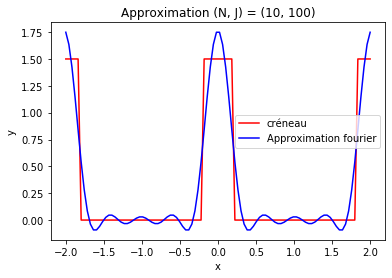

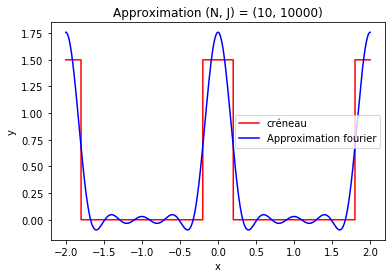

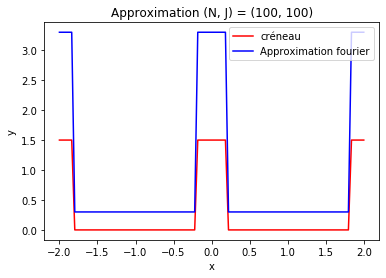

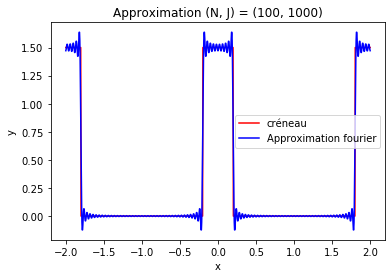

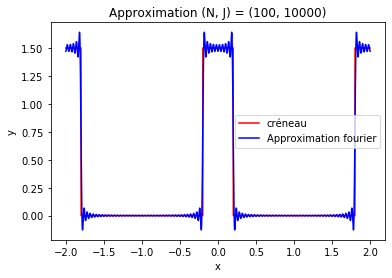

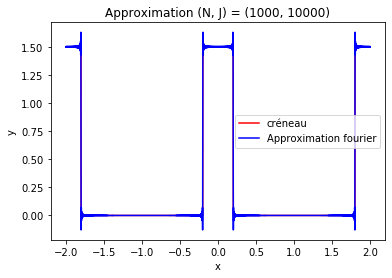

In [139]:
x0, y0, invy0 = x_y_invy(10, 100, 2, 1.5, 0.4)
x1, y1, invy1 = x_y_invy(10, 10000, 2, 1.5, 0.4)
x2, y2, invy2 = x_y_invy(100, 100, 2, 1.5, 0.4)

x3, y3, invy3 = x_y_invy(100, 1000, 2, 1.5, 0.4)
x4, y4, invy4 = x_y_invy(100, 100000, 2, 1.5, 0.4)
x5, y5, invy5 = x_y_invy(1000, 10000, 2, 1.5, 0.4)

plt.title("Approximation (N, J) = (10, 100)")
plt.plot(x0, y0, 'r', label="créneau")
plt.plot(x0, invy0, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (10, 10000)")
plt.plot(x1, y1, 'r', label="créneau")
plt.plot(x1, invy1, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (100, 100)")
plt.plot(x2, y2, 'r', label="créneau")
plt.plot(x2, invy2, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (100, 1000)")
plt.plot(x3, y3, 'r', label="créneau")
plt.plot(x3, invy3, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (100, 10000)")
plt.plot(x4, y4, 'r', label="créneau")
plt.plot(x4, invy4, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()


plt.title("Approximation (N, J) = (1000, 10000)")
plt.plot(x5, y5, 'r', label="créneau")
plt.plot(x5, invy5, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

Une augmentation de N permet d'avoir un meilleur convergence. Il faut cependant avoir J suffisament élevé pour eviter les problèmes d'échantillonnages. Il n'est pas forcément utile d'avoir J très élevé.

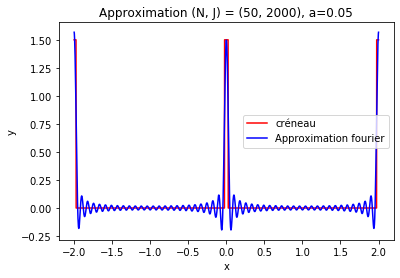

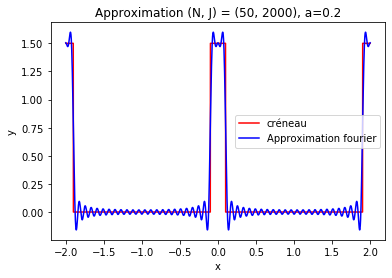

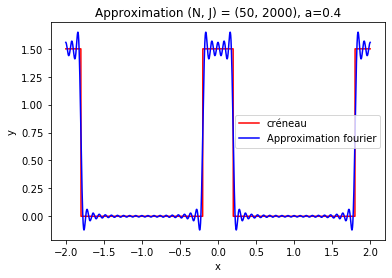

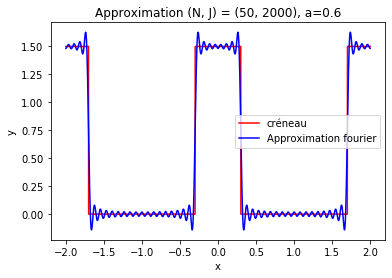

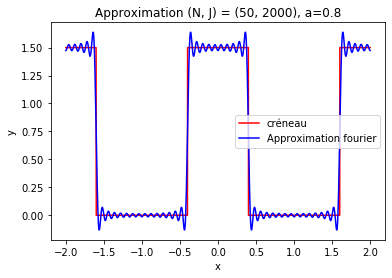

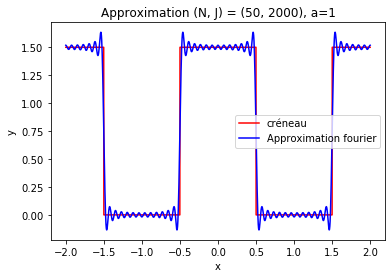

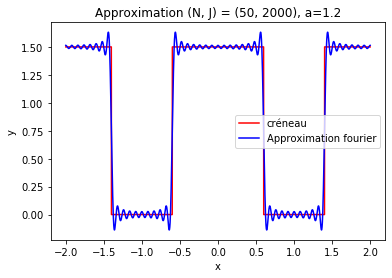

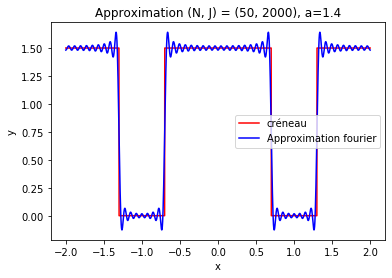

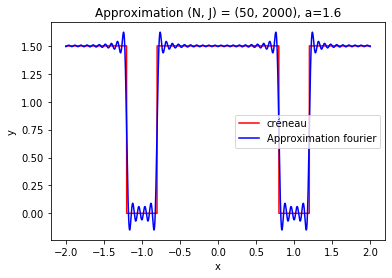

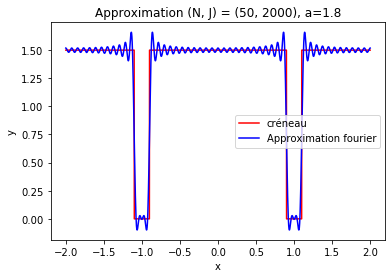

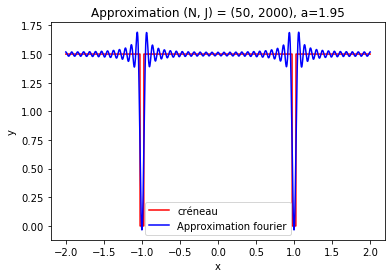

In [138]:
x0, y0, invy0 = x_y_invy(50, 2000, 2, 1.5, 0.05)
x1, y1, invy1 = x_y_invy(50, 2000, 2, 1.5, 0.2)
x2, y2, invy2 = x_y_invy(50, 2000, 2, 1.5, 0.4)
x3, y3, invy3 = x_y_invy(50, 2000, 2, 1.5, 0.6)
x4, y4, invy4 = x_y_invy(50, 2000, 2, 1.5, 0.8)
x5, y5, invy5 = x_y_invy(50, 2000, 2, 1.5, 1.0)
x6, y6, invy6 = x_y_invy(50, 2000, 2, 1.5, 1.2)
x7, y7, invy7 = x_y_invy(50, 2000, 2, 1.5, 1.4)
x8, y8, invy8 = x_y_invy(50, 2000, 2, 1.5, 1.6)
x9, y9, invy9 = x_y_invy(50, 2000, 2, 1.5, 1.8)
x10, y10, invy10 = x_y_invy(50, 2000, 2, 1.5, 1.95)

plt.title("Approximation (N, J) = (50, 2000), a=0.05")
plt.plot(x0, y0, 'r', label="créneau")
plt.plot(x0, invy0, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (50, 2000), a=0.2")
plt.plot(x1, y1, 'r', label="créneau")
plt.plot(x1, invy1, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (50, 2000), a=0.4")
plt.plot(x2, y2, 'r', label="créneau")
plt.plot(x2, invy2, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (50, 2000), a=0.6")
plt.plot(x3, y3, 'r', label="créneau")
plt.plot(x3, invy3, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (50, 2000), a=0.8")
plt.plot(x4, y4, 'r', label="créneau")
plt.plot(x4, invy4, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()


plt.title("Approximation (N, J) = (50, 2000), a=1")
plt.plot(x5, y5, 'r', label="créneau")
plt.plot(x5, invy5, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (50, 2000), a=1.2")
plt.plot(x6, y6, 'r', label="créneau")
plt.plot(x6, invy6, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (50, 2000), a=1.4")
plt.plot(x7, y7, 'r', label="créneau")
plt.plot(x7, invy7, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (50, 2000), a=1.6")
plt.plot(x8, y8, 'r', label="créneau")
plt.plot(x8, invy8, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (50, 2000), a=1.8")
plt.plot(x9, y9, 'r', label="créneau")
plt.plot(x9, invy9, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

plt.title("Approximation (N, J) = (50, 2000), a=1.95")
plt.plot(x10, y10, 'r', label="créneau")
plt.plot(x10, invy10, 'b', label="Approximation fourier")
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

On remarque qu'il y a une symétrie sur $a$ par rapport à $1$. De plus, quand le raport cyclique est extrémal (tend vers $0$ ou $1$) on a un fort phénomène d'oscillation aux discontinuités du créneau.

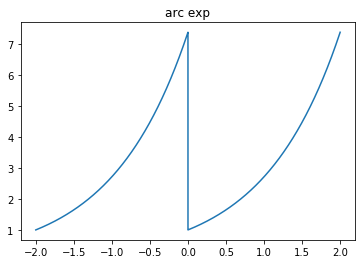

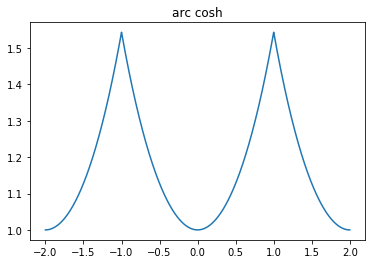

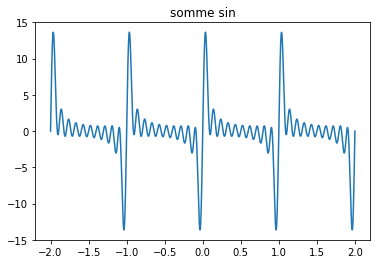

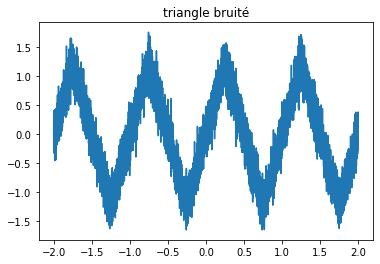

In [230]:
def arc_exp(x, a, T, A=1):
    while x > a + T:
        x -= T
    while x < a:
        x += T
    
    return A*np.exp(x)

x = np.linspace(-2, 2, 10000)
y0 = [arc_exp(x, 0, 2, 1) for x in x]
plt.plot(x, y0)
plt.title("arc exp")
plt.show()

def arc_ch(x, a, T, A=1):
    while x > a + T:
        x -=T
    while x < a:
        x += T
    
    return A*np.cosh(x)

y1 = [arc_ch(x, -1, 2, 1) for x in x]
plt.title("arc cosh")
plt.plot(x, y1)
plt.show()

def somme_sin_decr(x, f, n):
    s = 0
    for k in range(1,n+1):
        s += sin(2*pi*f*x*k)*np.exp(-k/10)*(2*k)**0.5
    return s
y2 = [somme_sin_decr(x, 1, 10) for x in x]
plt.title("somme sin")
plt.plot(x, y2)
plt.show()

def somme_sin_bruit(x, f, n):
    s = 0
    for k in range(n):
        s += sin(2*pi*f*x*(2*k+1))/(2*k+1)**2*(-1)**k
    return s + np.random.normal(0, 0.2)
y3 = [somme_sin_bruit(x, 1, 10) for x in x]
plt.title("triangle bruité")
plt.plot(x, y3)
plt.show()

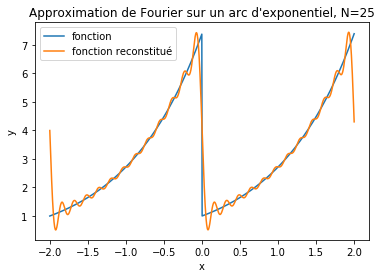

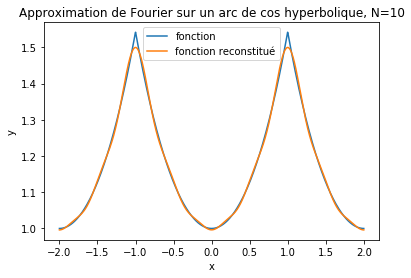

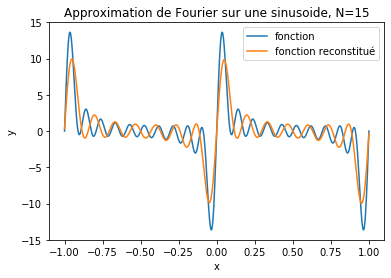

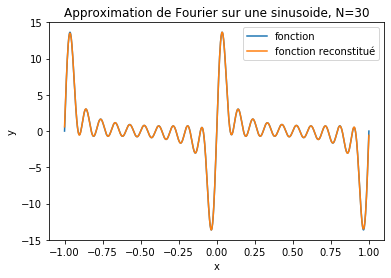

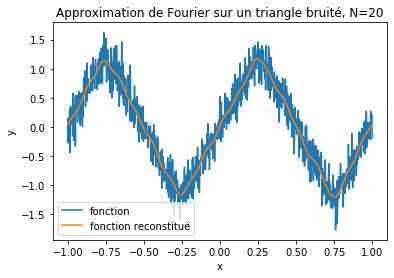

In [233]:
N=25
J=1000
A = 1
a = 0
T= 2

X = np.linspace(-T, T, J)
y = [arc_exp(x, a, T, A) for x in X]
coef_f = discreteFourier(T, y, N)
inv_y = invFourier(T, coef_f, J)
inv_y = np.real(inv_y)
plt.plot(X, y, label="fonction")
plt.plot(X, inv_y, label="fonction reconstitué")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Approximation de Fourier sur un arc d'exponentiel, N={N}")
plt.show()


#Fonction continue (des arcs de cos hyperbolique)
N=10
J=1000
A = 1
a = -1
T= 2

X = np.linspace(-T, T, J)
y = [arc_ch(x, a, T, A) for x in X]
coef_f = discreteFourier(T, y, N)
inv_y = invFourier(T, coef_f, J)
inv_y = np.real(inv_y)
plt.plot(X, y, label="fonction")
plt.plot(X, inv_y, label="fonction reconstitué")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Approximation de Fourier sur un arc de cos hyperbolique, N={N}")
plt.show()

#Fonction C-inf
N=15
J=1000
T= 1
X = np.linspace(-T, T, J)
y = [somme_sin_decr(x, T, 10) for x in X]
coef_f = discreteFourier(T, y, N)
inv_y = invFourier(T, coef_f, J)
inv_y = np.real(inv_y)
plt.plot(X, y, label="fonction")
plt.plot(X, inv_y, label="fonction reconstitué")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Approximation de Fourier sur une sinusoide, N={N}")
plt.show()

N=30
J=1000
T= 1
f= 1
X = np.linspace(-T, T, J)
y = [somme_sin_decr(x, f, 10) for x in X]
coef_f = discreteFourier(T, y, N)
inv_y = invFourier(T, coef_f, J)
inv_y = np.real(inv_y)
plt.plot(X, y, label="fonction")
plt.plot(X, inv_y, label="fonction reconstitué")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Approximation de Fourier sur une sinusoide, N={N}")
plt.show()


N=20
J=1000
T= 1
f= 1/T
X = np.linspace(-T, T, J)
y = [somme_sin_bruit(x, f, 10) for x in X]
coef_f = discreteFourier(T, y, N)
inv_y = invFourier(T, coef_f, J)
inv_y = np.real(inv_y)
plt.plot(X, y, label="fonction")
plt.plot(X, inv_y, label="fonction reconstitué")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Approximation de Fourier sur un triangle bruité, N={N}")
plt.show()


On a fait pleins de tests en changeant les paramètres.
On observe le même phénomène d'oscillation autour des discontinuité. Pour une fonction continue, la convergence semble rapide et la courbe plus lisse ($1^{er}$ et $2^e$ graphiques)

On arrive aussi a faire du filtrage, si on ne prend pas $N$ assez grand sur un signal périodique on perd les hautes fréquence ($3^e$ et $4^e$ graphiques). On peut donc utiliser cela pour filtrer un bruit à haute fréquence ($5^e$ graphique)